# DATA PREPROCESSING

In [7]:
import os
import pandas as pd
import numpy as np

# Script to combine all signals
# Set the data path
"""Path of the data"""
DATA_PATH = "./"

"""Path to save the merged individual attribute"""
# Set the save path
SAVE_PATH = "./"

# Create the save path directory if it doesn't exist
if not os.path.exists(SAVE_PATH):
    os.mkdir(SAVE_PATH)

final_columns = {
    'ACC': ['id', 'X', 'Y', 'Z', 'datetime'],
    'BVP': ['id', 'BVP', 'datetime'],
    'EDA': ['id', 'EDA', 'datetime'],
    'HR': ['id', 'HR', 'datetime'],
    'IBI': ['id', 'Initial', 'Interval', 'datetime'],
    'TEMP': ['id', 'TEMP', 'datetime']
}

names = {
    'ACC.csv': ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z'],
    'BVP.csv': ['BVP'],
    'EDA.csv': ['EDA'],
    'HR.csv': ['HR'], 
    'IBI.csv': ['IBI_0', 'IBI_1'],
    'TEMP.csv': ['TEMP']
}

desired_signals = ['ACC.csv', 'BVP.csv', 'EDA.csv', 'HR.csv', 'IBI.csv', 'TEMP.csv']

acc = pd.DataFrame(columns=final_columns['ACC'])
bvp = pd.DataFrame(columns=final_columns['BVP'])
eda = pd.DataFrame(columns=final_columns['EDA'])
hr = pd.DataFrame(columns=final_columns['HR'])
ibi = pd.DataFrame(columns=final_columns['IBI'])
temp = pd.DataFrame(columns=final_columns['TEMP'])

"""create datetime attribute"""
def process_df(df, file):
    start_timestamp = df.iloc[0,0]
    sample_rate = df.iloc[1,0]
    new_df = pd.DataFrame(df.iloc[2:].values, columns=df.columns)
    new_df['id'] =  file[-2:]
    new_df['datetime'] = [(start_timestamp + i/sample_rate) for i in range(len(new_df))]
    return new_df

"""Merge all the attribute of different folders into single csv with datetime and id"""
#Combine data with same names in multiple folders
for folder in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, folder)
    if os.path.isdir(folder_path):
        print(f'Processing {folder}')
        for sub_folder in os.listdir(folder_path):
            sub_folder_path = os.path.join(folder_path, sub_folder)
            if os.path.isdir(sub_folder_path):
                print(f'Processing {sub_folder} in {folder}')
                for signal in os.listdir(sub_folder_path):
                    if os.path.isfile(os.path.join(sub_folder_path, signal)):
                        if signal in desired_signals:
                            df = pd.read_csv(os.path.join(sub_folder_path, signal), names=names[signal], header=None)
                            if not df.empty:
                                if signal == 'ACC.csv':
                                    acc = pd.concat([acc, process_df(df, folder)])
                                    print("ACC df:", acc)
                                if signal == 'BVP.csv':
                                    bvp = pd.concat([bvp, process_df(df, folder)])
                                    print("BVP df:", bvp)
                                if signal == 'EDA.csv':
                                    eda = pd.concat([eda, process_df(df, folder)])
                                    print("EDA df:", eda)
                                if signal == 'HR.csv':
                                    hr = pd.concat([hr, process_df(df, folder)])
                                    print("HR df:", hr)
                                if signal == 'IBI.csv':
                                    ibi = pd.concat([ibi, process_df(df, folder)])
                                    print("IBI df:", ibi)
                                if signal == 'TEMP.csv':
                                    temp = pd.concat([temp, process_df(df, folder)])
                                    print("TEMP df:", temp)
                            else:
                                print(f"{signal} in {sub_folder} is empty")
                    else:
                        print(f"{signal} in {sub_folder} is not a file")
            else:
                print(f"{sub_folder} in {folder} is not a directory")
    else:
        print(f"{folder} is not a directory")

"""Saving the csv so dont have to execute again and again"""
#Saving combined data
print('Saving Data ...')
acc.to_csv(os.path.join(SAVE_PATH, 'combined_acc.csv'), index=False)
bvp.to_csv(os.path.join(SAVE_PATH, 'combined_bvp.csv'), index=False)
eda.to_csv(os.path.join(SAVE_PATH, 'combined_eda.csv'), index=False)
hr.to_csv(os.path.join(SAVE_PATH, 'combined_hr.csv'), index=False)
ibi.to_csv(os.path.join(SAVE_PATH, 'combined_ibi.csv'), index=False)
temp.to_csv(os.path.join(SAVE_PATH, 'combined_temp.csv'), index=False)

combined_acc.csv is not a directory
combined_bvp.csv is not a directory
combined_eda.csv is not a directory
combined_hr.csv is not a directory
combined_ibi.csv is not a directory
combined_temp.csv is not a directory
Processing Raw_data
Readme in Raw_data is not a directory
Processing S01 in Raw_data
ACC df:         id    X    Y    Z      datetime  accelerometer_X  accelerometer_Y  \
0       ta  NaN  NaN  NaN  1.644226e+09             -2.0             43.0   
1       ta  NaN  NaN  NaN  1.644226e+09             -2.0             44.0   
2       ta  NaN  NaN  NaN  1.644226e+09              2.0             44.0   
3       ta  NaN  NaN  NaN  1.644226e+09              3.0             43.0   
4       ta  NaN  NaN  NaN  1.644226e+09              1.0             43.0   
...     ..  ...  ...  ...           ...              ...              ...   
104305  ta  NaN  NaN  NaN  1.644229e+09             35.0              2.0   
104306  ta  NaN  NaN  NaN  1.644229e+09             34.0              3.0  

## CREATING FINAL MERGED DATA

In [8]:
import pandas as pd
import os

"""location of all combined attribute csv"""
# Set the data path
COMBINED_DATA_PATH = "./"

"""location to save all attribute merged in one csv"""
# Set the save path
SAVE_PATH = "./"

# Create the save path directory if it doesn't exist 
if COMBINED_DATA_PATH != SAVE_PATH:
    os.mkdir(SAVE_PATH)
                                          
print("Reading data ...")
acc, bvp, eda, hr, ibi, temp = None, None, None, None, None, None

signals = ['acc','bvp', 'eda', 'hr','ibi', 'temp']

results = []
for signal in signals:
    df = pd.read_csv(os.path.join(COMBINED_DATA_PATH, f"combined_{signal}.csv"), dtype={'id': str})
    results.append([signal, df])

for i in results:
    globals()[i[0]] = i[1]

# Merge data
print('Merging Data ...')
ids = eda['id'].unique()
columns = ['X', 'Y', 'Z','BVP', 'EDA', 'HR','IBI', 'TEMP', 'id', 'datetime']

results = []
for id in ids:
    print(f"Processing {id}")
    df = pd.DataFrame(columns=columns)

    acc_id = acc[acc['id'] == id]
    bvp_id = bvp[bvp['id'] == id].drop(['id'], axis=1)
    eda_id = eda[eda['id'] == id].drop(['id'], axis=1)
    hr_id = hr[hr['id'] == id].drop(['id'], axis=1)
    ibi_id = ibi[ibi['id'] == id].drop(['id'], axis=1)
    temp_id = temp[temp['id'] == id].drop(['id'], axis=1)

    """Merging on common attribute"""
    df = acc_id.merge(bvp_id, on='datetime', how='outer')
    df = df.merge(eda_id, on='datetime', how='outer')
    df = df.merge(hr_id, on='datetime', how='outer')
    df = df.merge(ibi_id, on='datetime', how='outer')
    df = df.merge(temp_id, on='datetime', how='outer')

    """filling null value with forward and backward fill"""
    #Filling null values with Forward and Backward value imputation
    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)

    results.append(df)

print(results)
new_df = pd.concat(results, ignore_index=True)

"""saving the final csv so dont have to repeat execution again and again"""
print("Saving data ...")
new_df.to_csv(os.path.join(SAVE_PATH, "merged_data.csv"), index=False)

Reading data ...
Merging Data ...
Processing ta
[          id   X   Y   Z      datetime  accelerometer_X  accelerometer_Y  \
0         ta NaN NaN NaN  1.644226e+09             -2.0             43.0   
1         ta NaN NaN NaN  1.644226e+09             -2.0             44.0   
2         ta NaN NaN NaN  1.644226e+09              2.0             44.0   
3         ta NaN NaN NaN  1.644226e+09              3.0             43.0   
4         ta NaN NaN NaN  1.644226e+09              1.0             43.0   
...       ..  ..  ..  ..           ...              ...              ...   
11246531  ta NaN NaN NaN  1.646661e+09            -17.0              1.0   
11246532  ta NaN NaN NaN  1.646661e+09            -17.0              1.0   
11246533  ta NaN NaN NaN  1.646661e+09            -17.0              1.0   
11246534  ta NaN NaN NaN  1.646661e+09            -17.0              1.0   
11246535  ta NaN NaN NaN  1.646661e+09            -17.0              1.0   

          accelerometer_Z    BVP      

## READING MERGED DATA

In [1]:
import pandas as pd

In [2]:
import pandas as pd
data = pd.read_csv('./merged_data.csv')

In [3]:
data.head()

,id,X,Y,Z,datetime,accelerometer_X,accelerometer_Y,accelerometer_Z,BVP,EDA,HR,Initial,Interval,IBI_0,IBI_1,TEMP
0,ta,NaN,NaN,NaN,1.644226e+09,-2.0,43.0,43.0,0.0,0.0,83.0,NaN,NaN,36.34375,0.859375,28.39
1,ta,NaN,NaN,NaN,1.644226e+09,-2.0,44.0,46.0,0.0,0.0,83.0,NaN,NaN,36.34375,0.859375,28.39
2,ta,NaN,NaN,NaN,1.644226e+09,2.0,44.0,47.0,0.0,0.0,83.0,NaN,NaN,36.34375,0.859375,28.39
3,ta,NaN,NaN,NaN,1.644226e+09,3.0,43.0,44.0,0.0,0.0,83.0,NaN,NaN,36.34375,0.859375,28.39
4,ta,NaN,NaN,NaN,1.644226e+09,1.0,43.0,45.0,0.0,0.0,83.0,NaN,NaN,36.34375,0.859375,28.39


## CREATING LABEL

In [4]:
import numpy as np
data['Label'] = np.where((data['accelerometer_X'] > data['accelerometer_X'].describe()[4]) & (data['accelerometer_Y'] > data['accelerometer_Y'].describe()[4]) & (data['accelerometer_Z'] > data['accelerometer_Z'].describe()[4]) & (data['BVP'] > data['BVP'].describe()[4]) & (data['HR'] > data['HR'].describe()[4]) & (data['IBI_1'] > data['IBI_1'].describe()[4]), 1, 0)

## DROPPING UNNECESSARY COLUMNS

In [5]:
# drop columns 'B' and 'C'
data.drop({'id','X','Y','Z','Initial','Interval'},axis = 1,inplace = True)

# EDA

In [6]:
data.shape

(11246536, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11246536 entries, 0 to 11246535
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   datetime         float64
 1   accelerometer_X  float64
 2   accelerometer_Y  float64
 3   accelerometer_Z  float64
 4   BVP              float64
 5   EDA              float64
 6   HR               float64
 7   IBI_0            float64
 8   IBI_1            float64
 9   TEMP             float64
 10  Label            int32  
dtypes: float64(10), int32(1)
memory usage: 900.9 MB


In [8]:
data.isnull().sum()

datetime           0
accelerometer_X    0
accelerometer_Y    0
accelerometer_Z    0
BVP                0
EDA                0
HR                 0
IBI_0              0
IBI_1              0
TEMP               0
Label              0
dtype: int64

In [9]:
data.duplicated().sum()

5856

In [10]:
# drop duplicates
data = data.drop_duplicates()

## DESCRIPTIVE STAT OF THE DATA

In [11]:
data.describe()

,datetime,accelerometer_X,accelerometer_Y,accelerometer_Z,BVP,EDA,HR,IBI_0,IBI_1,TEMP,Label
count,1.124068e+07,1.124068e+07,1.124068e+07,1.124068e+07,1.124068e+07,1.124068e+07,1.124068e+07,1.124068e+07,1.124068e+07,1.124068e+07,1.124068e+07
mean,1.645687e+09,-2.834689e+01,-1.185359e+00,4.487520e+01,-4.178381e-01,7.186907e-01,7.615671e+01,1.485442e+03,7.994808e-01,3.100510e+01,8.042236e-02
std,8.384237e+05,1.968147e+01,1.703510e+01,2.483555e+01,7.344983e+01,9.570107e-01,1.363526e+01,1.147857e+03,1.452445e-01,1.873115e+00,2.719460e-01
min,1.644226e+09,-1.280000e+02,-1.280000e+02,-1.280000e+02,-2.751640e+03,0.000000e+00,4.900000e+01,1.212500e+01,3.125000e-01,2.113000e+01,0.000000e+00
25%,1.644845e+09,-4.400000e+01,-7.000000e+00,3.800000e+01,-1.483000e+01,2.270620e-01,6.550000e+01,7.739062e+01,7.187500e-01,3.019000e+01,0.000000e+00
50%,1.646040e+09,-2.100000e+01,1.000000e+00,5.800000e+01,1.010000e+00,3.782370e-01,7.173000e+01,1.638594e+03,8.125000e-01,3.055000e+01,0.000000e+00
75%,1.646657e+09,-1.700000e+01,1.000000e+00,6.100000e+01,1.526000e+01,8.434520e-01,8.342000e+01,2.478578e+03,8.906250e-01,3.203000e+01,0.000000e+00
max,1.646842e+09,1.270000e+02,1.270000e+02,1.270000e+02,2.102490e+03,1.100507e+01,1.467800e+02,3.542312e+03,1.703125e+00,3.639000e+01,1.000000e+00


C:\Users\HP\AppData\Local\Temp\ipykernel_4920\2000273999.py:32: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



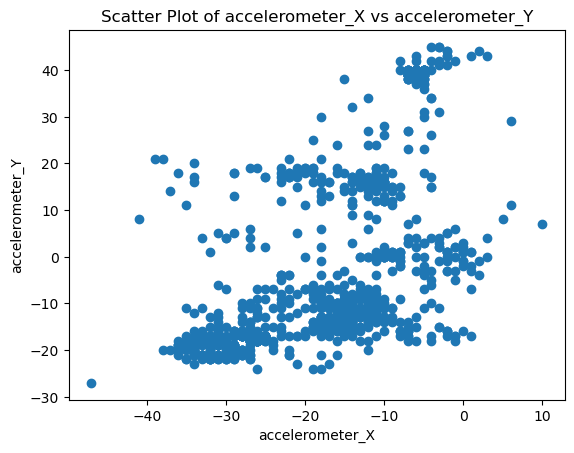

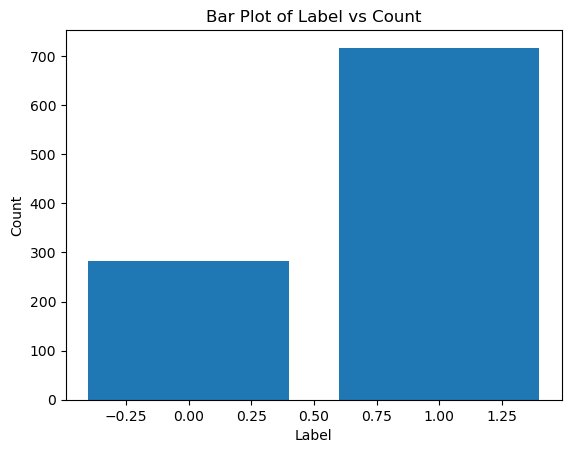

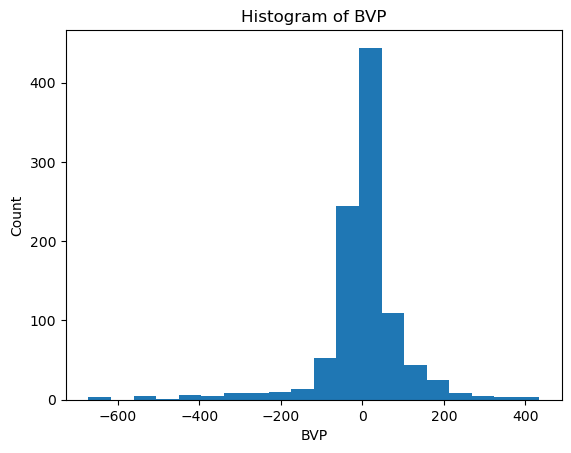

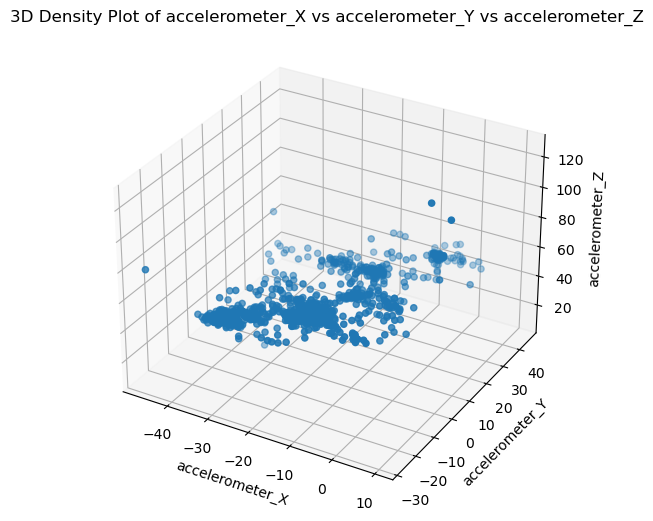

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

df=data[:1000]
# Create a scatter plot of accelerometer_X vs accelerometer_Y
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(df['accelerometer_X'], df['accelerometer_Y'])
ax1.set_xlabel('accelerometer_X')
ax1.set_ylabel('accelerometer_Y')
ax1.set_title('Scatter Plot of accelerometer_X vs accelerometer_Y')

# Create a bar plot of Label vs count
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.bar(df['Label'].unique(), df['Label'].value_counts())
ax2.set_xlabel('Label')
ax2.set_ylabel('Count')
ax2.set_title('Bar Plot of Label vs Count')

# Create a histogram of BVP
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.hist(df['BVP'], bins=20)
ax3.set_xlabel('BVP')
ax3.set_ylabel('Count')
ax3.set_title('Histogram of BVP')

# Create a 3D density plot of accelerometer_X vs accelerometer_Y vs accelerometer_Z
fig4 = plt.figure()
ax4 = p3.Axes3D(fig4)
ax4.scatter(df['accelerometer_X'], df['accelerometer_Y'], df['accelerometer_Z'])
ax4.set_xlabel('accelerometer_X')
ax4.set_ylabel('accelerometer_Y')
ax4.set_zlabel('accelerometer_Z')
ax4.set_title('3D Density Plot of accelerometer_X vs accelerometer_Y vs accelerometer_Z')

# Show the plots
plt.show()

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='HR'>

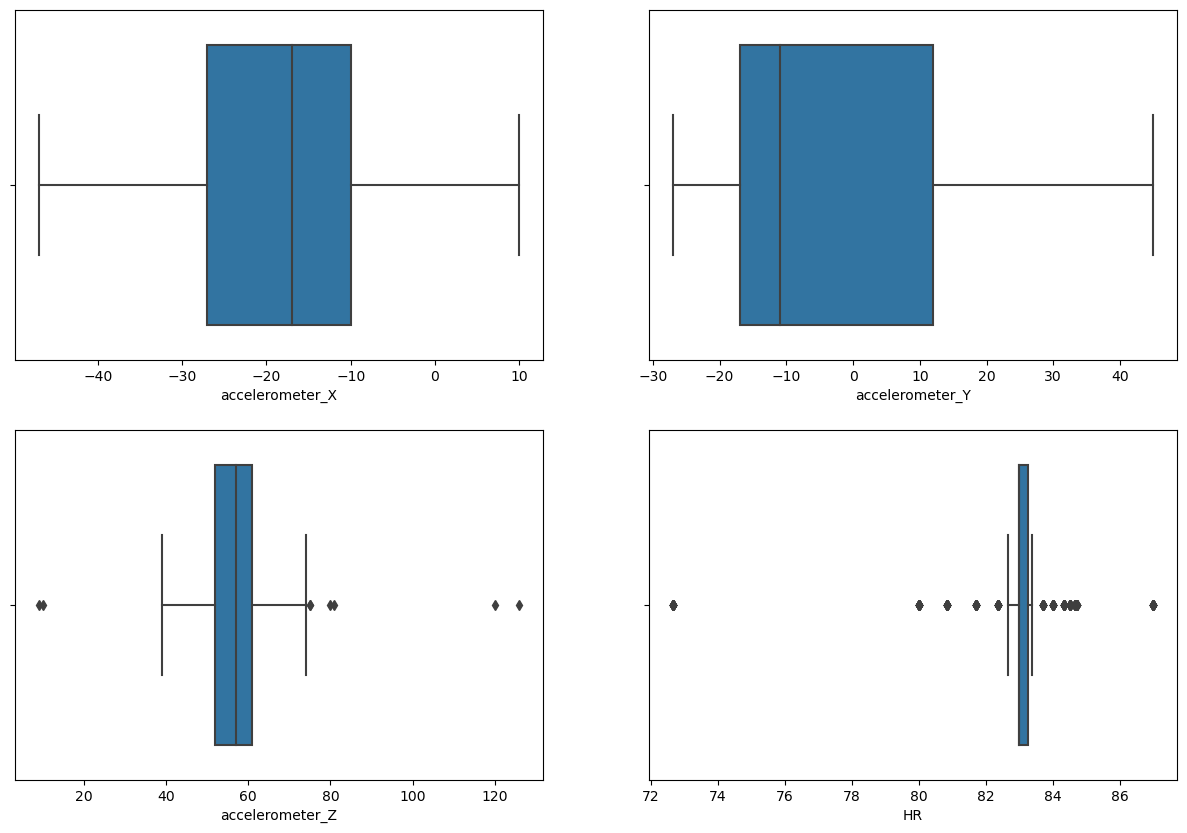

In [25]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot(x=df["accelerometer_X"], ax = axes[0][0])
sns.boxplot(x=df["accelerometer_Y"], ax = axes[0][1])
sns.boxplot(x=df["accelerometer_Z"], ax = axes[1][0])
sns.boxplot(x=df["HR"], ax = axes[1][1])
# sns.boxplot(df["IBI_0"], ax = axes[2][0])

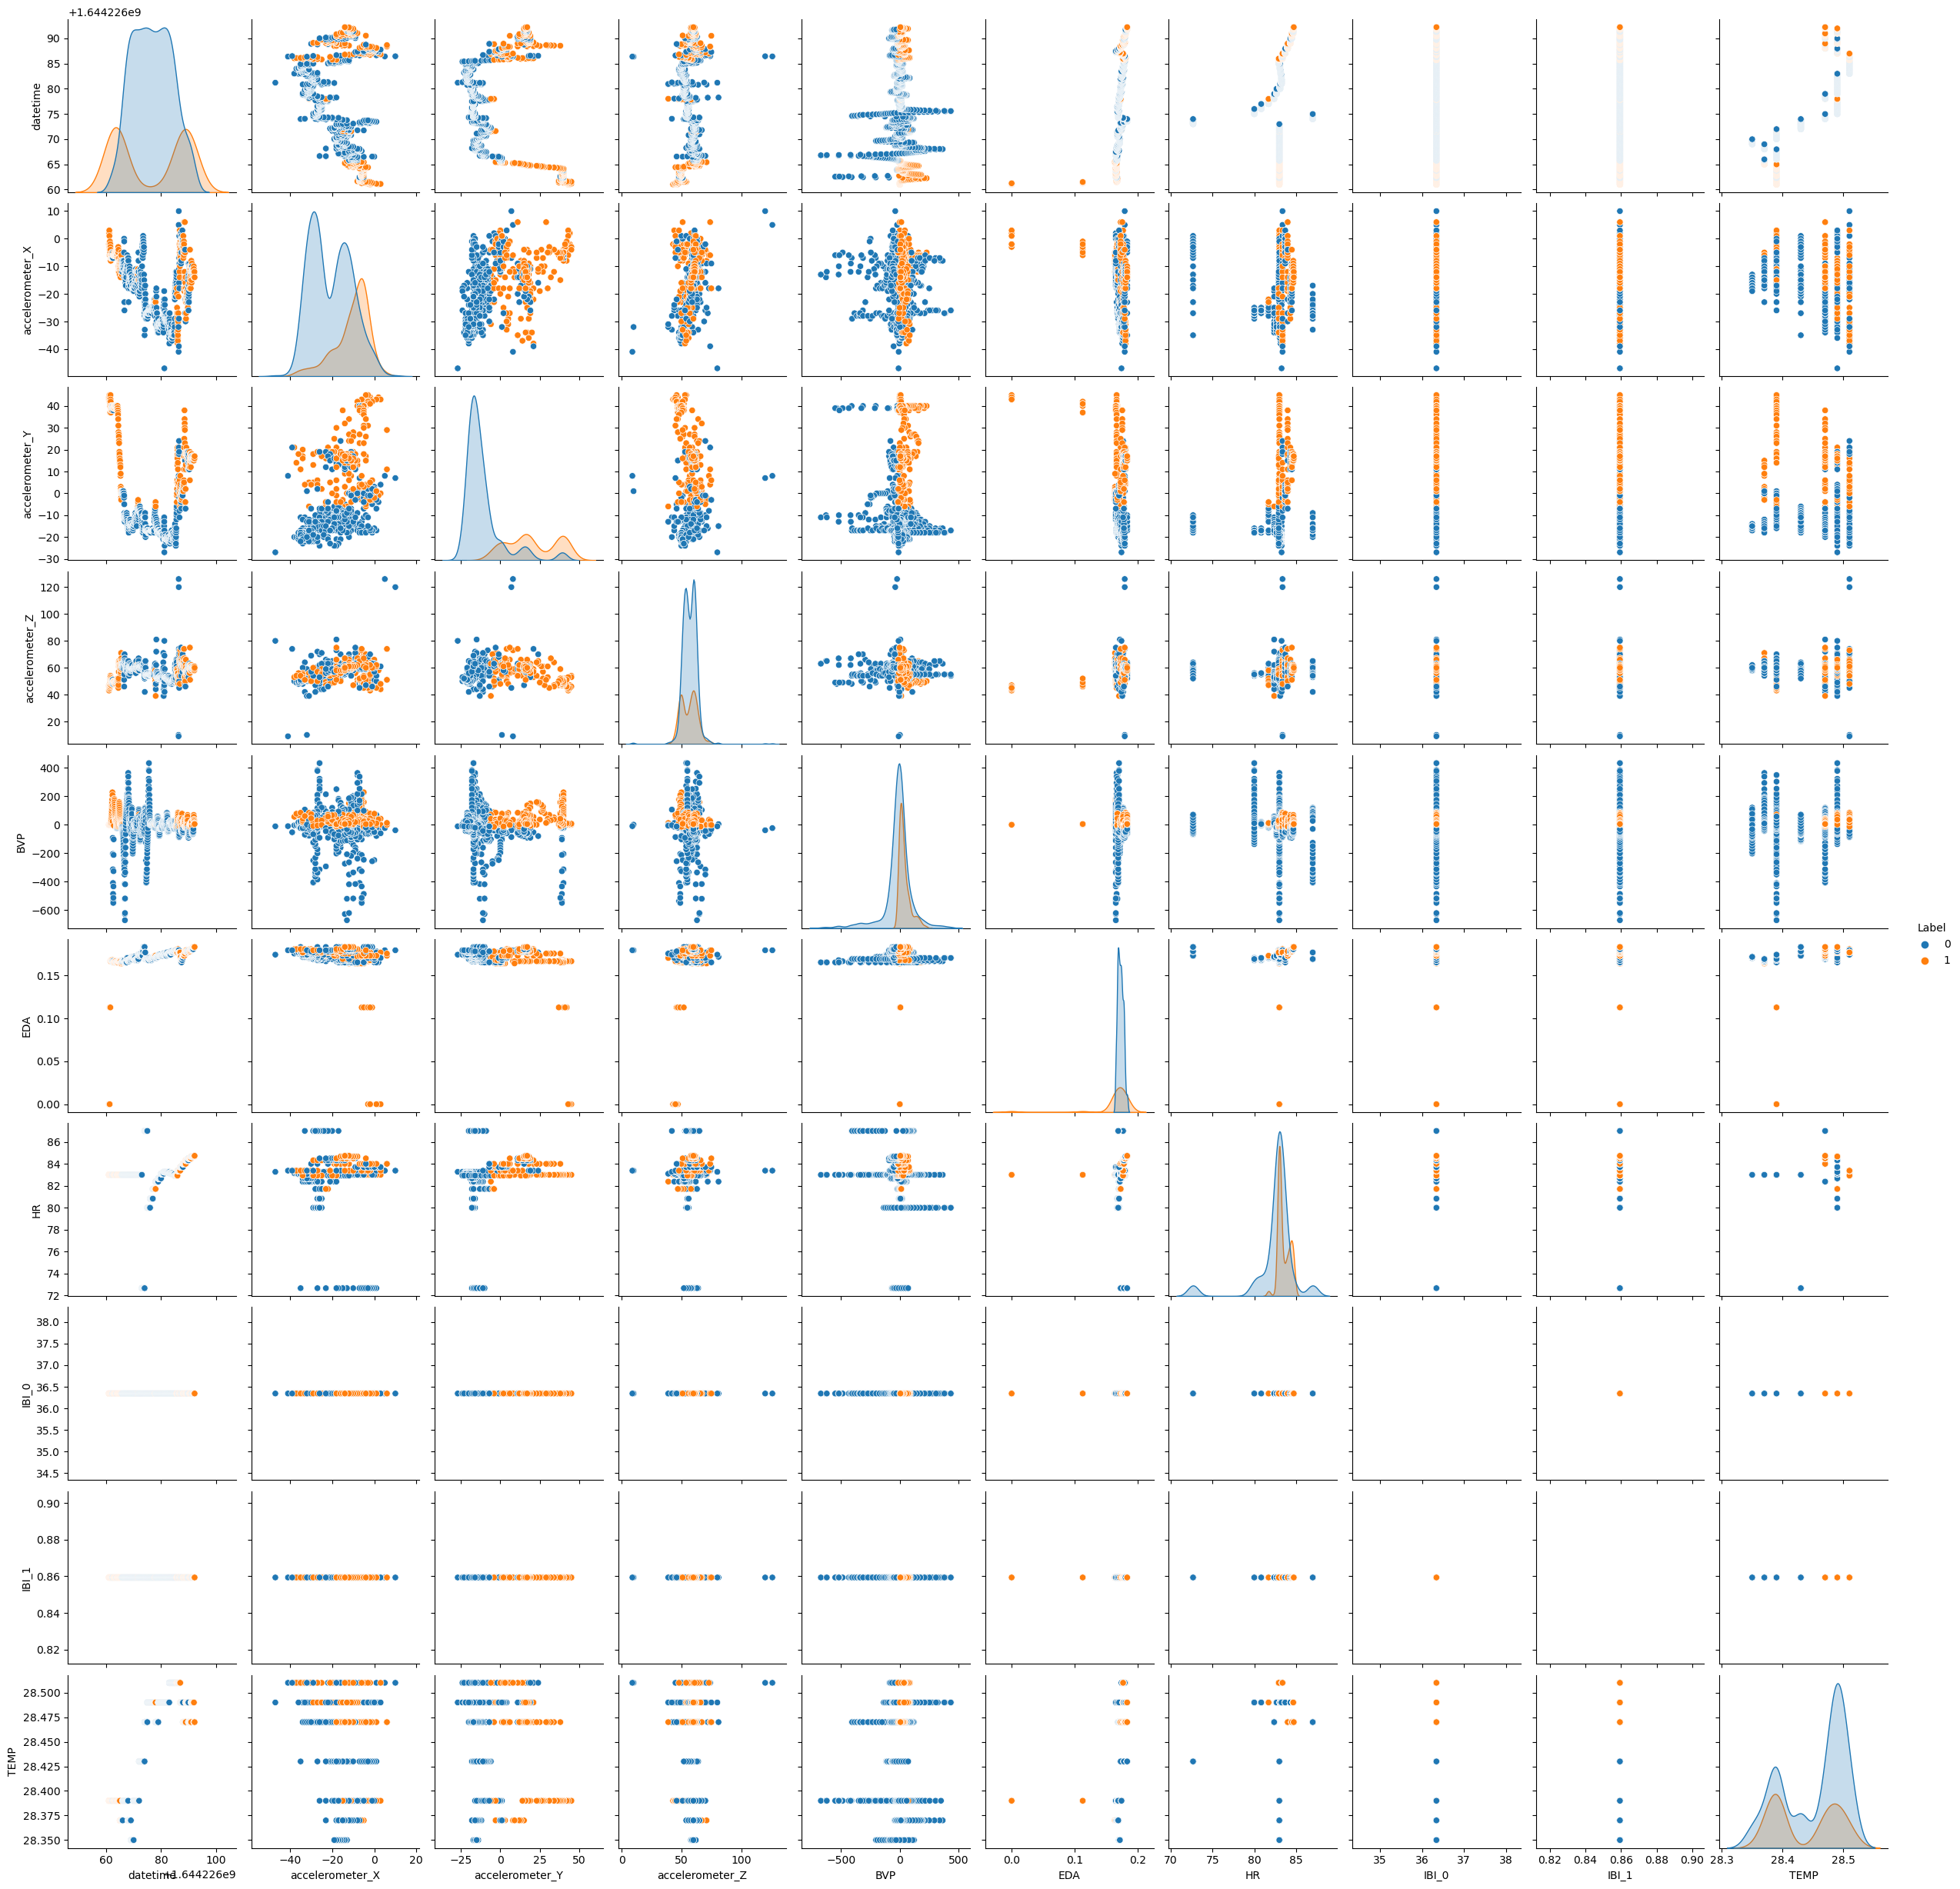

In [26]:
sns.pairplot(df, hue = "Label")

In [27]:
data=data.drop(['datetime'],axis=1)

In [28]:
data.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,BVP,EDA,HR,IBI_0,IBI_1,TEMP,Label
0,-2.0,43.0,43.0,0.0,0.0,83.0,36.34375,0.859375,28.39,1
1,-2.0,44.0,46.0,0.0,0.0,83.0,36.34375,0.859375,28.39,1
2,2.0,44.0,47.0,0.0,0.0,83.0,36.34375,0.859375,28.39,1
3,3.0,43.0,44.0,0.0,0.0,83.0,36.34375,0.859375,28.39,1
4,1.0,43.0,45.0,0.0,0.0,83.0,36.34375,0.859375,28.39,1


# FEATURE SELECTION

In [29]:
from sklearn.model_selection import train_test_split
y=data['Label']
X=data.drop(['Label'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns =X_train.columns

In [30]:
from sklearn.ensemble import RandomForestClassifier
m1= RandomForestClassifier(n_estimators=50, min_samples_leaf=3, max_features=0.7, n_jobs=-1, oob_score=True)
m1.fit(X_train,y_train)
m1.score(X_test,y_test)

0.9999994069160704

In [31]:
feature_importances = pd.DataFrame(m1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
IBI_1,0.236046
BVP,0.219796
accelerometer_Y,0.200907
accelerometer_Z,0.193598
HR,0.077403
accelerometer_X,0.055564
TEMP,0.008557
IBI_0,0.007623
EDA,0.000506


In [32]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

In [33]:
y_pred = m1.predict(X_test)

In [35]:
confusion_matrix(y_test, y_pred)

array([[3101240,       0],
       [      2,  270962]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3101240
           1       1.00      1.00      1.00    270964

    accuracy                           1.00   3372204
   macro avg       1.00      1.00      1.00   3372204
weighted avg       1.00      1.00      1.00   3372204



In [38]:
y_pred = m1.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   7235438
           1       1.00      1.00      1.00    633038

    accuracy                           1.00   7868476
   macro avg       1.00      1.00      1.00   7868476
weighted avg       1.00      1.00      1.00   7868476



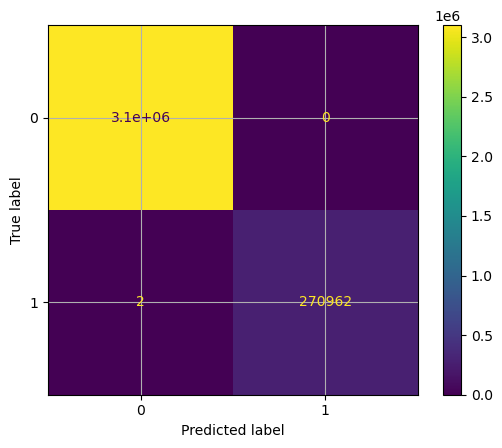

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(None)